# Example usage of our classifier

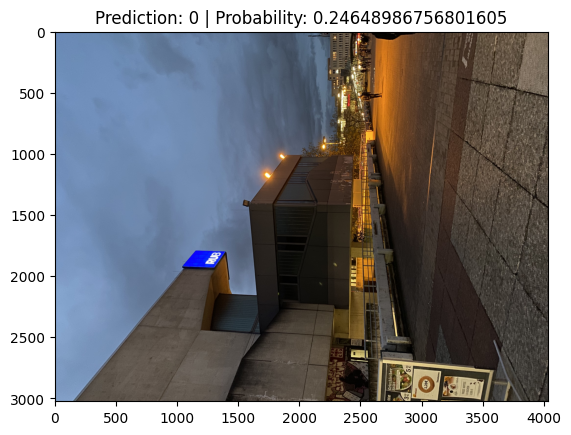

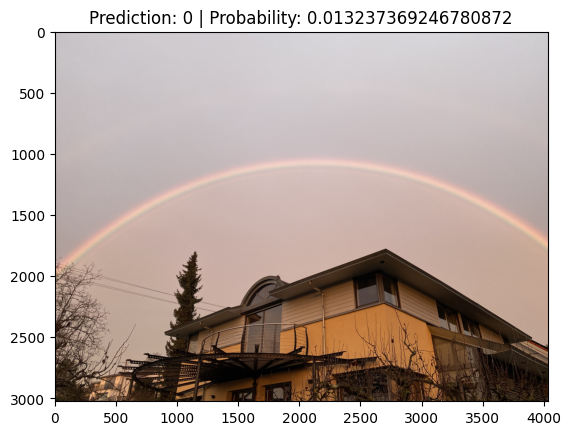

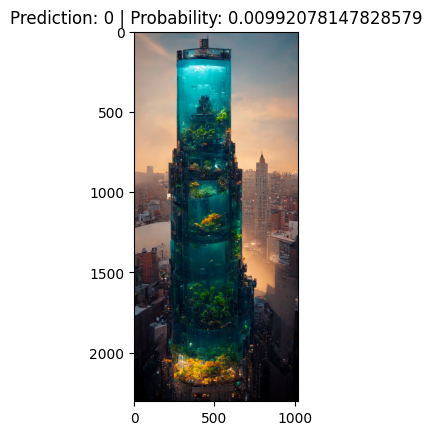

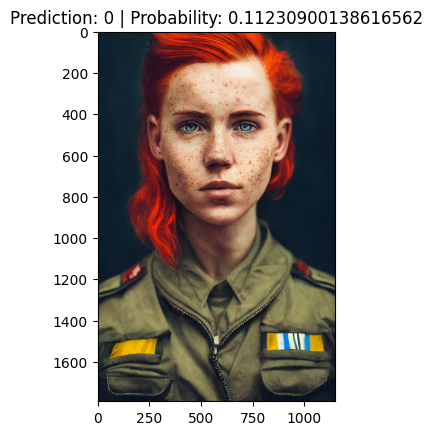

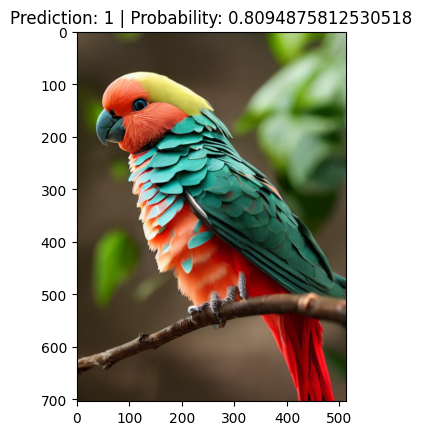

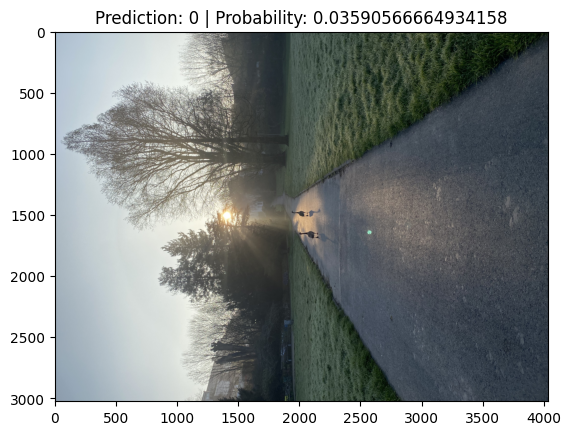

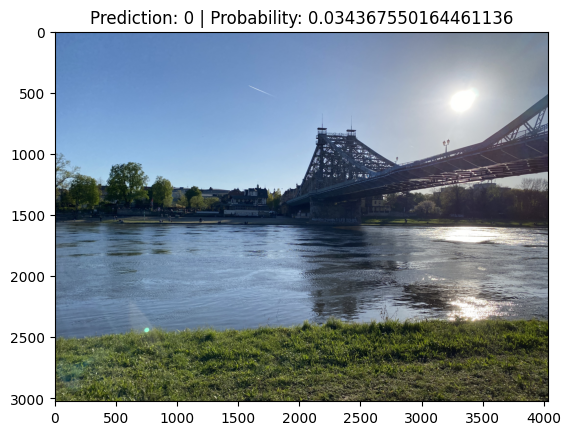

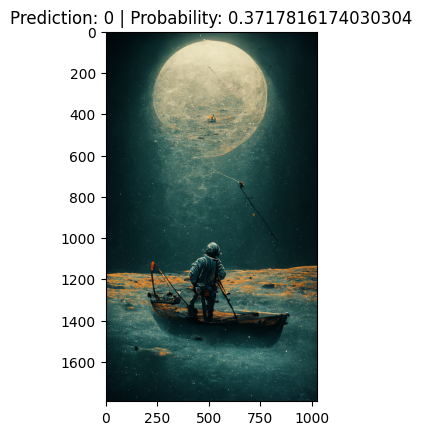

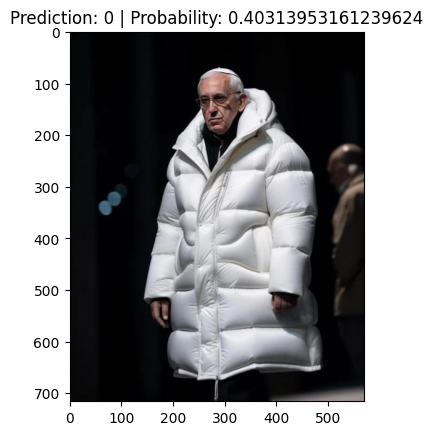

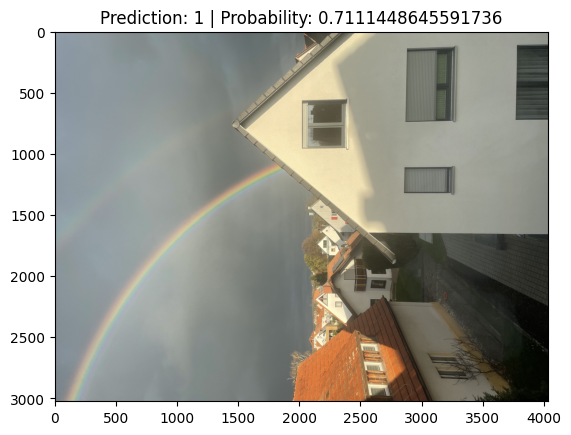

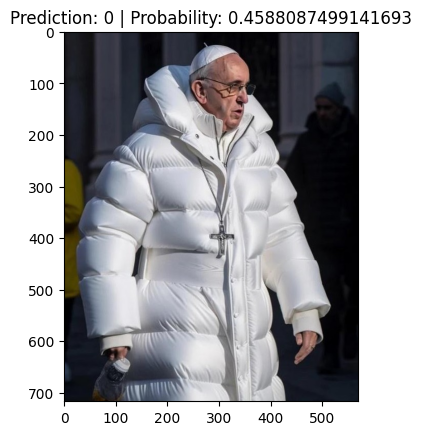

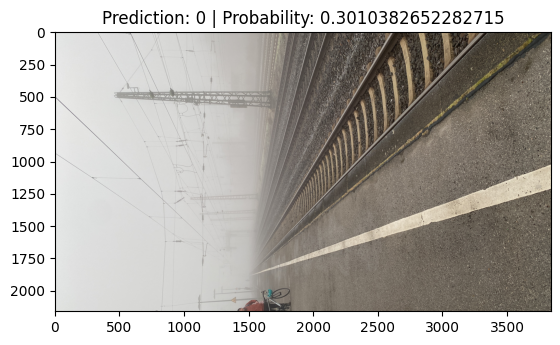

In [1]:

import os
import torch
from torchvision.transforms import Compose, RandomCrop, Resize, ToTensor
from PIL import Image
import matplotlib.pyplot as plt

# TODO: input correct paths
PATH = 'final_classifier.pth'
image_folder = "test_difficult/"

image_transform = Compose([
    RandomCrop(3000, pad_if_needed=True),
    Resize((360, 360)),
    ToTensor(),
])

def load_model(model_path):
    model = torch.jit.load(model_path)
    return model

def predict_images_in_batch(image_folder_path, model):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    for image_file in os.listdir(image_folder_path):
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder_path, image_file)
            image = Image.open(image_path)
            img_tensor = image_transform(image)
            inputs = img_tensor.to(device)

            with torch.no_grad():
                prediction = model(inputs.unsqueeze(0))

            # print(prediction)
            
            # show images
            plt.imshow(image)
            plt.title(f"Prediction: {int(prediction[1][0])} | Probability: {float(prediction[0][0])}")
            plt.show()

model = load_model(PATH)
predict_images_in_batch(image_folder, model)